### Scenario 
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# Case Study Roadmap - Ask 
* The problem to solve is understanding how casual riders and annual members use Cyclistic bikes differently.
* Based on my insights, my team will design a new marketing strategy to convert casual riders into annual members.

### Key tasks ###
* Identify the business task.  
* Consider key stakeholders. 
Primary stakeholders: Cyclistic marketing analyst team, customers, Cyclistic executives team

### Deliverable ###
Understand how casual riders and annual members use Cyclistic bikes differently to design marketing strategies aimed at converting casual riders into annual members, with compelling data insights and professional data visualizations.

# Case Study Roadmap - Prepare
* The data is located at an index of a bucket called "divvy-tripdata"
* The data is organize per year and months 
   
Metadata: 
1. Cyclistic Bike-share
1. Source https://divvy-tripdata.s3.amazonaws.com/index.html
1. Data Sample  Year 2020; Months january, february, march, april 
1. Last modified May 26th 2020, 05:17:43 pm

I decided to sample the data and focus on the year 2020 from January to April.
* How did you verify the data’s integrity?

### Key tasks
* Download data and store it appropriately.
* Identify how it’s organized.
* Sort and filter the data.
* Determine the credibility of the data.

### Deliverable
A description of all data sources used

# Case Study Roadmap - Process

* What tools are you choosing and why?
1. Python: I have experience working with this programming language.
1. Tableau: I decided to create additional visualizations with Tableau because it is a versatile tool.

* Have you ensured your data’s integrity?
1. Data integrity ensured by : 
1. Validating data range
1. Looking for duplicates
1. Verifying the data-type
1. Looking for missing values 

### Key tasks
* Check the data for errors.
* Choose your tools.
* Transform the data so you can work with it effectively.
* Document the cleaning process

### Deliverable
Documentation of any cleaning or manipulation of data


# 

#### Loading Libraries ####

In [ ]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        from datetime import time

/kaggle/input/cyclistics-data-april-2020-march-2021/202011-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202012-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202004-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202009-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202006-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202010-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202008-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202101-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202007-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202103-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202104-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202102-divvy-tripdata.csv
/kaggle/input/cyclistics-data-april-2020-march-2021/202005-divvy

#### Load the CSV into a DataFrame ####


In [ ]:

df=pd.read_csv('/Users/kimberlyrasgado/Documents/02 Courses/Analytics-Certification/05 Case study/Case_Study_1_Bike-Share/divvy-tripdata/2020/Divvy_Trips_2020_Q1.csv')

# Obtaining information about the DataFrame and verifying the data types using the data schema. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


In [ ]:
# First exploration 
df 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member


 ### Performing data Validation 

In [ ]:
# Split data and time for column started_at

df['started_date'] = pd.to_datetime(df['started_at']).dt.date
df['started_time'] = pd.to_datetime(df['started_at']).dt.time

# Split data and time for column ended_at

df['ended_date'] = pd.to_datetime(df['ended_at']).dt.date
df['ended_time'] = pd.to_datetime(df['ended_at']).dt.time


In [ ]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,2020-01-21,20:06:59,2020-01-21,20:14:30
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,2020-01-30,14:22:39,2020-01-30,14:26:22
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2020-01-09,19:29:26,2020-01-09,19:32:17
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,2020-01-06,16:17:07,2020-01-06,16:25:56
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,2020-01-30,08:37:16,2020-01-30,08:42:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual,2020-03-10,10:40:06,2020-03-10,10:40:07
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member,2020-03-07,15:25:55,2020-03-07,16:14:03
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual,2020-03-01,13:12:38,2020-03-01,13:38:29
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member,2020-03-07,18:02:45,2020-03-07,18:13:18


In [ ]:

#Changing data type new columns data and time  

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df['started_date']=pd.to_datetime(df['started_date'])
df['ended_date']=pd.to_datetime(df['ended_date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             426887 non-null  object        
 1   rideable_type       426887 non-null  object        
 2   started_at          426887 non-null  datetime64[ns]
 3   ended_at            426887 non-null  datetime64[ns]
 4   start_station_name  426887 non-null  object        
 5   start_station_id    426887 non-null  int64         
 6   end_station_name    426886 non-null  object        
 7   end_station_id      426886 non-null  float64       
 8   start_lat           426887 non-null  float64       
 9   start_lng           426887 non-null  float64       
 10  end_lat             426886 non-null  float64       
 11  end_lng             426886 non-null  float64       
 12  member_casual       426887 non-null  object        
 13  started_date        426887 no

In [ ]:
# Checking for duplicate data. Based on the results, it can be concluded that there is no duplicated data.

duplicated_data = print( df.duplicated().sum())

0


In [ ]:
# Checking for null Values.

null_values = print(df.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      1
end_station_id        1
start_lat             0
start_lng             0
end_lat               1
end_lng               1
member_casual         0
started_date          0
started_time          0
ended_date            0
ended_time            0
dtype: int64


In [ ]:
# Creating a new data frame, dfnew, without null values.

dfnew = df.dropna(how='any',axis=0)

# Dimensions of the DataFrame
dfnew.shape

(426886, 17)

In [ ]:
dfnew

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,2020-01-21,20:06:59,2020-01-21,20:14:30
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,2020-01-30,14:22:39,2020-01-30,14:26:22
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,2020-01-09,19:29:26,2020-01-09,19:32:17
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,2020-01-06,16:17:07,2020-01-06,16:25:56
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,2020-01-30,08:37:16,2020-01-30,08:42:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual,2020-03-10,10:40:06,2020-03-10,10:40:07
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member,2020-03-07,15:25:55,2020-03-07,16:14:03
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual,2020-03-01,13:12:38,2020-03-01,13:38:29
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member,2020-03-07,18:02:45,2020-03-07,18:13:18


In [ ]:
# Finding the number of unique values in each column 

print(dfnew.nunique())
print (dfnew.shape)


ride_id               426886
rideable_type              1
started_at            399264
ended_at              399531
start_station_name       607
start_station_id         607
end_station_name         602
end_station_id           602
start_lat                518
start_lng                484
end_lat                  514
end_lng                  482
member_casual              2
started_date              91
started_time           68091
ended_date               104
ended_time             68292
dtype: int64
(426886, 17)


In [ ]:
# Observing the distribution of the member types "casual and member.

pie_member_casual = dfnew['member_casual'].value_counts()

print(pie_member_casual)


member_casual
member    378407
casual     48479
Name: count, dtype: int64


In [ ]:
# Percentage of each type of member

print ('member', 378407 / (378407+48479))
print ('casual', 48479 / (378407+48479))

member 0.8864357228862038
casual 0.11356427711379619


In [ ]:
pie_member_casual.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, member to casual
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


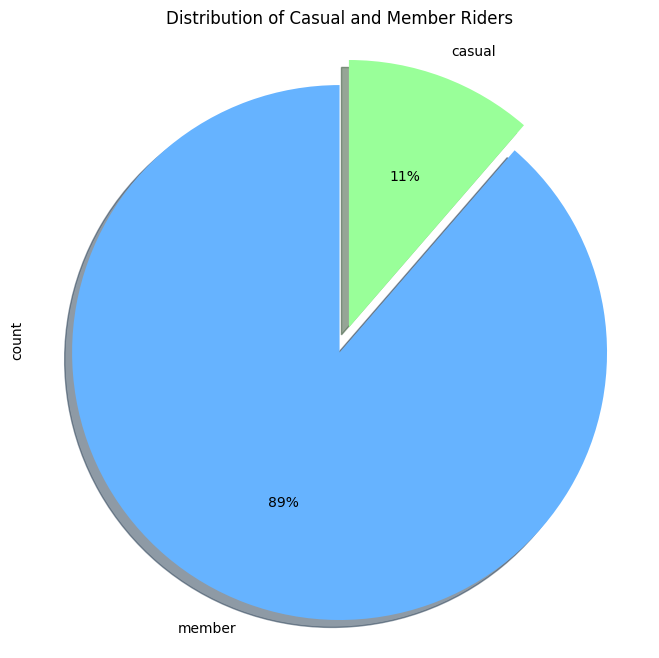

In [ ]:
# create a pie chart
colors = ['#66b3ff', '#99ff99']  
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))  

pie_member_casual.plot(kind='pie', y='member_casual', autopct='%1.0f%%', colors=colors, explode=explode, startangle=90, shadow=True)
plt.title("Distribution of Casual and Member Riders")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

>  It seems the company is doing well, with only 11% being casual users and 89% being members. I'll perform further analysis to investigate

In [ ]:
# Observing the rideable_type distribution for member types "casual and member.

rideable_type_dist = dfnew['rideable_type'].value_counts()

print(rideable_type_dist)

rideable_type
docked_bike    426886
Name: count, dtype: int64


In [ ]:
# Finding the most popular starting and ending stations for riders

#start / end station id
mode_start_station_id = dfnew.start_station_id.mode()
mode_end_station_id = dfnew.end_station_id.mode()

# start / end station name
mode_start_station_name = dfnew.start_station_name.mode()
mode_end_station_name = dfnew.end_station_name.mode()

>  One popular station does not reveal enough. I decided to identify the 10 most start/ending  common stations


In [ ]:
# Finding the 10  popular starting and start stations for riders.

count_st_stat_name = dfnew['start_station_name'].value_counts().nlargest(10).to_frame()
print(count_st_stat_name)

                              count
start_station_name                 
Canal St & Adams St            7813
Clinton St & Madison St        6797
Clinton St & Washington Blvd   5941
Kingsbury St & Kinzie St       4626
Columbus Dr & Randolph St      4425
HQ QR                          3766
Franklin St & Monroe St        3711
Canal St & Madison St          3637
Clinton St & Lake St           3580
Larrabee St & Kingsbury St     3550


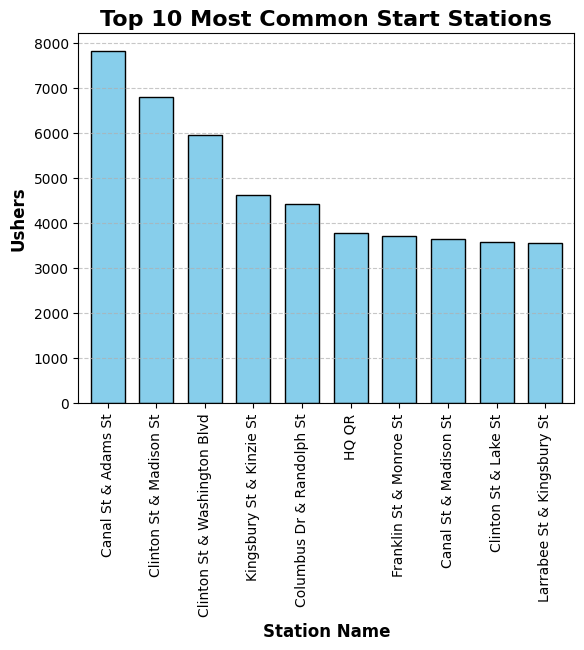

In [ ]:
ax = count_st_stat_name.plot(kind='bar', rot=90, width=0.7, color='skyblue', edgecolor='black', legend=False)

ax.set_xlabel('Station Name', fontweight='bold', fontsize=12)
ax.set_ylabel('Ushers', fontweight='bold', fontsize=12)  # Add 'Ushers' as the y-axis label
ax.set_title('Top 10 Most Common Start Stations', fontweight='bold', fontsize=16)



ax.grid(axis='y', linestyle='--', alpha=0.7, which='both')


plt.show()

In [ ]:
# get top 10 most frequent start_station_name

count_end_stat_name = dfnew['end_station_name'].value_counts().nlargest(10).to_frame()
print(count_end_stat_name)

                              count
end_station_name                   
Canal St & Adams St            8323
Clinton St & Washington Blvd   7166
Clinton St & Madison St        6854
Kingsbury St & Kinzie St       4615
Michigan Ave & Washington St   4227
HQ QR                          3766
Franklin St & Monroe St        3748
Canal St & Madison St          3706
Clinton St & Lake St           3646
St. Clair St & Erie St         3618


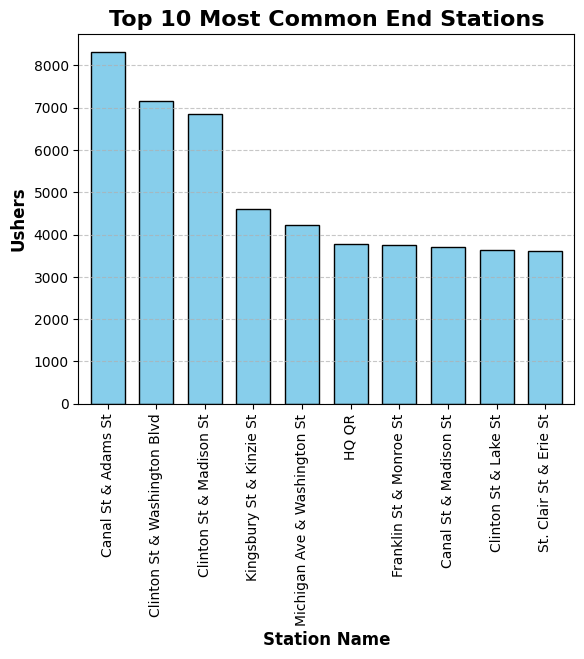

In [ ]:
plt.show()

ax = count_end_stat_name.plot(kind='bar', rot=90, width=0.7, color='skyblue', edgecolor='black', legend=False)

ax.set_xlabel('Station Name', fontweight='bold', fontsize=12)
ax.set_ylabel('Ushers', fontweight='bold', fontsize=12)  # Add 'Ushers' as the y-axis label
ax.set_title('Top 10 Most Common End Stations', fontweight='bold', fontsize=16)



ax.grid(axis='y', linestyle='--', alpha=0.7, which='both')


plt.show()

In [ ]:
#Defining the target audience: Once we identify the top 10 popular stations, we explore where casual riders use stations the most

df_casual = dfnew[dfnew.member_casual != 'member']
df_casual.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_date,started_time,ended_date,ended_time
20,3479141FF24AD595,docked_bike,2020-01-16 17:10:39,2020-01-16 17:40:40,Lake Shore Dr & Monroe St,76,Michigan Ave & Washington St,43.0,41.8810,-87.6167,41.8840,-87.6247,casual,2020-01-16,17:10:39,2020-01-16,17:40:40
33,CDA4546AFB6F34F5,docked_bike,2020-01-05 13:54:08,2020-01-05 14:24:03,Logan Blvd & Elston Ave,258,Stockton Dr & Wrightwood Ave,324.0,41.9295,-87.6842,41.9313,-87.6387,casual,2020-01-05,13:54:08,2020-01-05,14:24:03
152,69A8CB6748CA2DB0,docked_bike,2020-01-22 15:11:17,2020-01-22 17:15:50,Burling St (Halsted) & Diversey Pkwy (Temp),332,Broadway & Sheridan Rd,256.0,41.9331,-87.6478,41.9528,-87.6500,casual,2020-01-22,15:11:17,2020-01-22,17:15:50
157,1DD6245D8E796F48,docked_bike,2020-01-29 22:44:04,2020-01-29 22:53:53,Milwaukee Ave & Grand Ave,84,Damen Ave & Grand Ave,214.0,41.8916,-87.6484,41.8912,-87.6769,casual,2020-01-29,22:44:04,2020-01-29,22:53:53
189,7C3CF816107BE767,docked_bike,2020-01-20 10:45:43,2020-01-20 11:27:02,Broadway & Barry Ave,300,Clark St & Wrightwood Ave,340.0,41.9377,-87.6441,41.9295,-87.6431,casual,2020-01-20,10:45:43,2020-01-20,11:27:02


In [ ]:
df_casual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48479 entries, 20 to 426886
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             48479 non-null  object        
 1   rideable_type       48479 non-null  object        
 2   started_at          48479 non-null  datetime64[ns]
 3   ended_at            48479 non-null  datetime64[ns]
 4   start_station_name  48479 non-null  object        
 5   start_station_id    48479 non-null  int64         
 6   end_station_name    48479 non-null  object        
 7   end_station_id      48479 non-null  float64       
 8   start_lat           48479 non-null  float64       
 9   start_lng           48479 non-null  float64       
 10  end_lat             48479 non-null  float64       
 11  end_lng             48479 non-null  float64       
 12  member_casual       48479 non-null  object        
 13  started_date        48479 non-null  datetime64[ns

#### Gaining further insights

In [ ]:
# Obtaining the top 10 start stations used by casual members.

count_st_stat_name_casual= df_casual['start_station_name'].value_counts().nlargest(10).to_frame()
print(count_st_stat_name_casual)

                              count
start_station_name                 
HQ QR                          3765
Lake Shore Dr & Monroe St      1590
Streeter Dr & Grand Ave        1530
Shedd Aquarium                  998
Millennium Park                 779
Michigan Ave & Oak St           631
Theater on the Lake             567
Michigan Ave & Washington St    495
Dusable Harbor                  490
Adler Planetarium               465


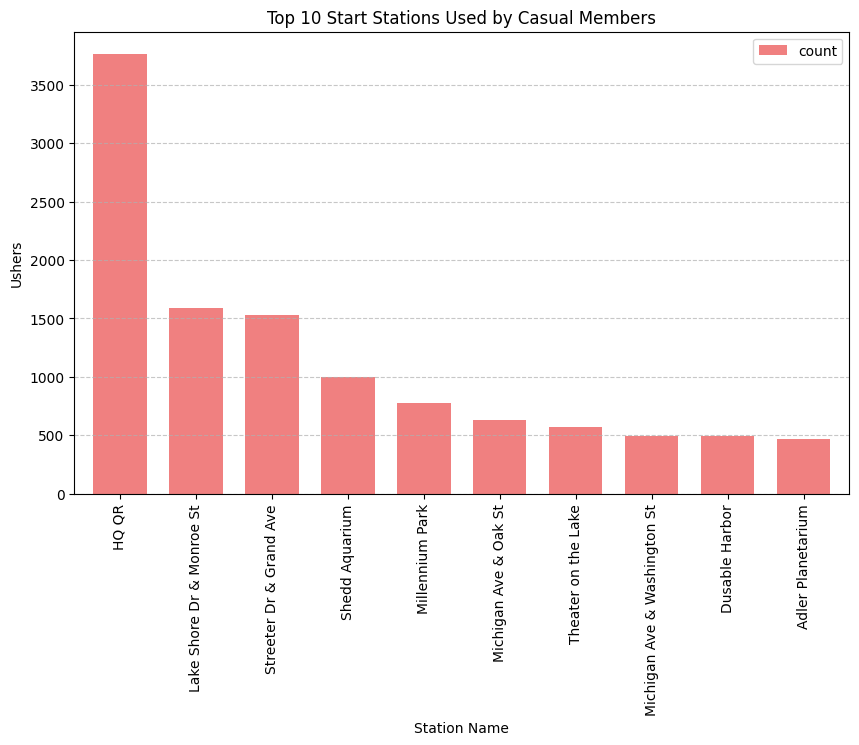

In [ ]:
count_st_stat_name_casual.plot(kind='bar', rot=90, width=0.7, color='lightcoral', figsize=(10, 6))
plt.xlabel('Station Name')
plt.ylabel('Ushers')
plt.title('Top 10 Start Stations Used by Casual Members')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Obtaining the top 10 Ended stations used by casual members.

count_end_stat_name_casual= df_casual['end_station_name'].value_counts().nlargest(10).to_frame()
print(count_end_stat_name_casual)

                              count
end_station_name                   
HQ QR                          3764
Streeter Dr & Grand Ave        1856
Lake Shore Dr & Monroe St      1269
Millennium Park                1114
Shedd Aquarium                  821
Michigan Ave & Oak St           738
Theater on the Lake             729
Michigan Ave & Washington St    555
Wabash Ave & Grand Ave          501
Lake Shore Dr & North Blvd      485


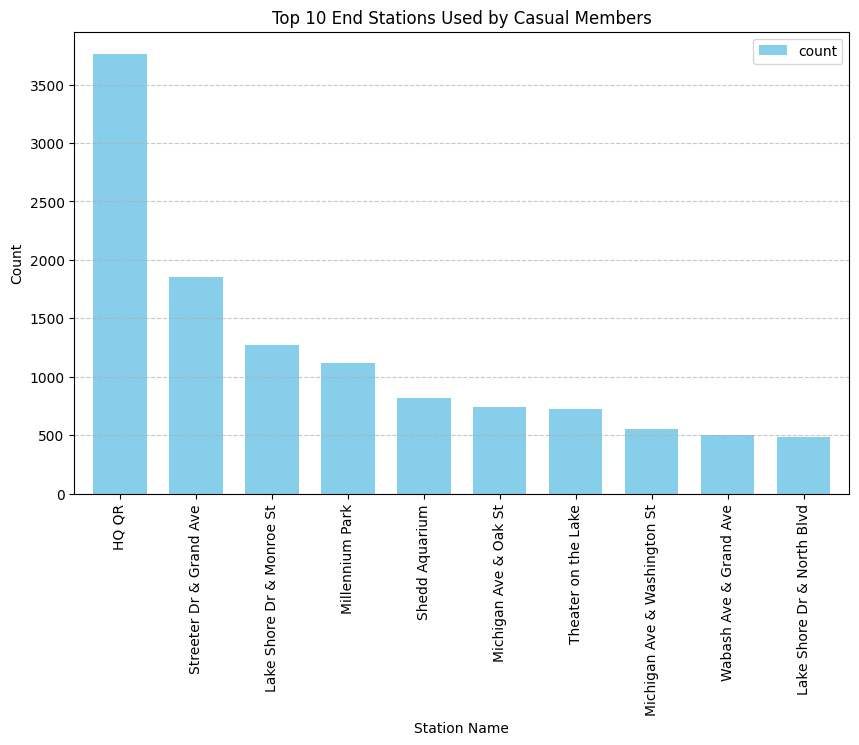

In [ ]:
count_end_stat_name_casual.plot(kind='bar', rot=90, width=0.7, color='skyblue', figsize=(10, 6))
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.title('Top 10 End Stations Used by Casual Members')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Obtaining the top 10 start and end stations used by casual members.

count_combined_stat_names_casual = count_end_stat_name_casual.join(count_st_stat_name_casual, how='outer', lsuffix='_end', rsuffix='_start')
print(count_combined_stat_names_casual)

                              count_end  count_start
Adler Planetarium                   NaN        465.0
Dusable Harbor                      NaN        490.0
HQ QR                            3764.0       3765.0
Lake Shore Dr & Monroe St        1269.0       1590.0
Lake Shore Dr & North Blvd        485.0          NaN
Michigan Ave & Oak St             738.0        631.0
Michigan Ave & Washington St      555.0        495.0
Millennium Park                  1114.0        779.0
Shedd Aquarium                    821.0        998.0
Streeter Dr & Grand Ave          1856.0       1530.0
Theater on the Lake               729.0        567.0
Wabash Ave & Grand Ave            501.0          NaN


### Exploring Daily Ridership Trends and Top 5 Start and End Stations for Casual Members


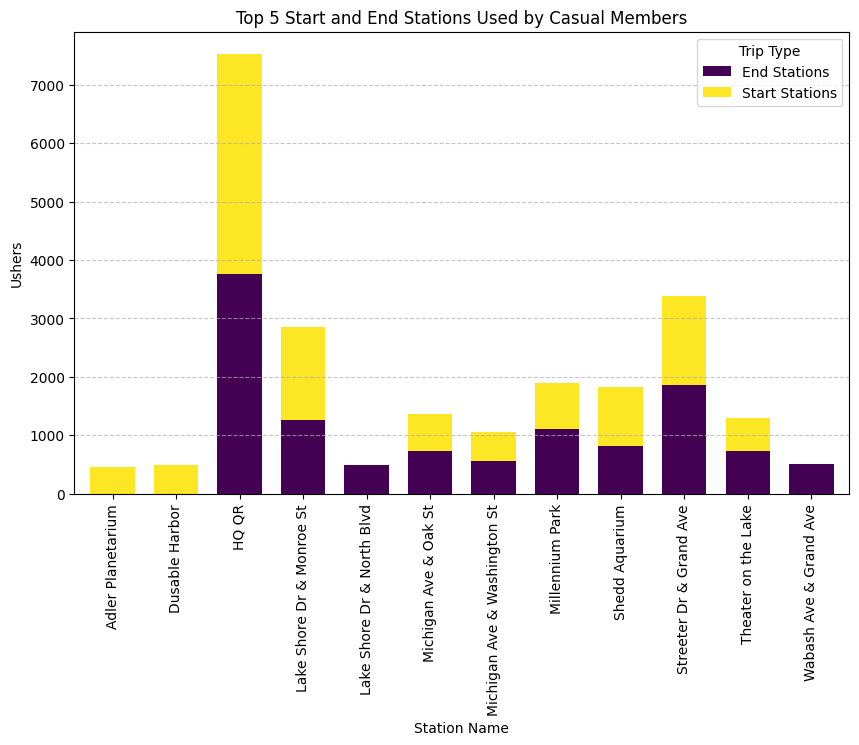

In [ ]:
# Visualize the ridership at the top 5 start and end stations used by casual members.


count_combined_stat_names_casual.plot(kind='bar', stacked=True, width=0.7, colormap='viridis', figsize=(10, 6))
plt.xlabel('Station Name')
plt.ylabel('Ushers')
plt.title('Top 5 Start and End Stations Used by Casual Members')
plt.legend(title='Trip Type', labels=['End Stations', 'Start Stations'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


> In the chart, it is observed that the most busiest stations where riders both start and end their trips are:
> * HQ RW
> * Streeter Dr & Grand Ave
> * Lake Shore Dr & Monroe St
> * Shedd Aquarium
> * Millennium Park"

#### Finding the busiest day to launch the marketing campaign.

In [ ]:
# Identifying which day has the highest traffic for the 'started_date'.

traffic_started_date = (df_casual.set_index('started_date')['member_casual'].eq('casual').groupby(pd.Grouper(freq = 'D')).sum())
print(traffic_started_date)

started_date
2020-01-01    477
2020-01-02    663
2020-01-03    453
2020-01-04    390
2020-01-05    431
             ... 
2020-03-27    183
2020-03-28    265
2020-03-29    279
2020-03-30    303
2020-03-31    213
Freq: D, Name: member_casual, Length: 91, dtype: int64


> Now we can find the day with the most traffic for the top 10 stations.

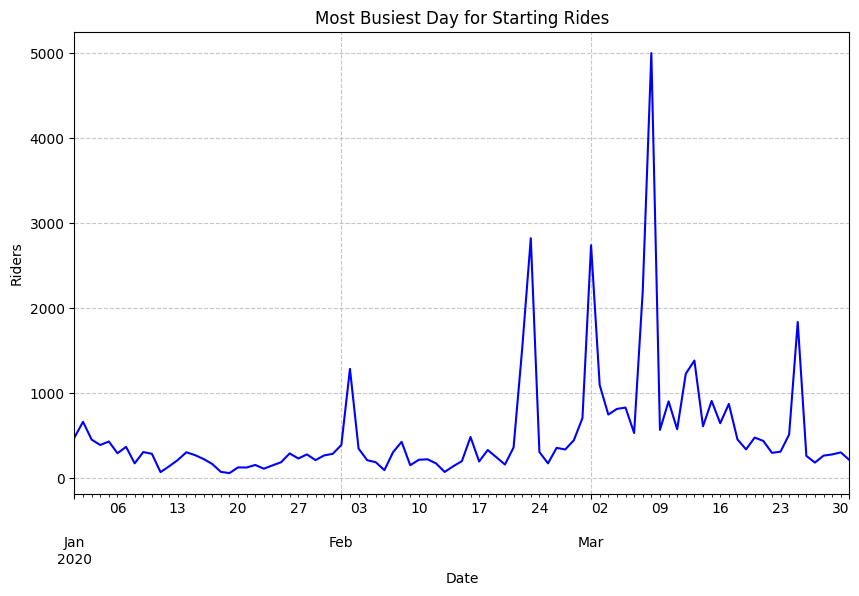

In [ ]:
# Now we can find the Started day with most traffic for the top t stations 

traffic_started_date.plot.line(marker='', linestyle='-', color='b', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Riders')
plt.title('Most Busiest Day for Starting Rides')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



In [ ]:
# Identifying which day has the highest traffic for the 'started_date'.
traffic_ended_date = (df_casual.set_index('ended_date')['member_casual'].eq('casual').groupby(pd.Grouper(freq = 'D')).sum())
print(traffic_ended_date)

ended_date
2020-01-01    464
2020-01-02    662
2020-01-03    457
2020-01-04    389
2020-01-05    427
             ... 
2020-05-15      0
2020-05-16      0
2020-05-17      0
2020-05-18      0
2020-05-19      1
Freq: D, Name: member_casual, Length: 140, dtype: int64


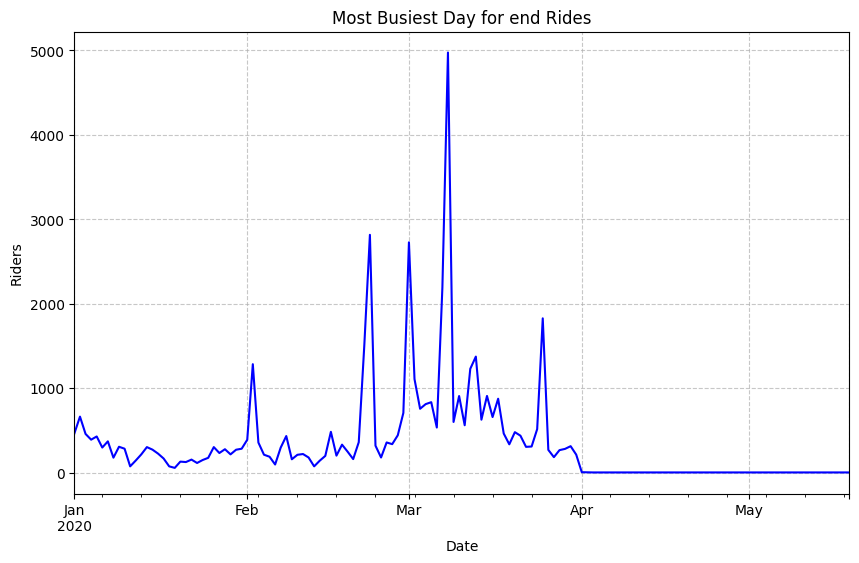

In [ ]:
# Now we can find the  Ended day with most traffic for the top t stations 

traffic_ended_date.plot.line(marker='', linestyle='-', color='b', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Riders')
plt.title('Most Busiest Day for end Rides')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* Your top three recommendations based on your analysis
1. The marketing campaign can be centered around the top 5 stations where riders both start and end their trips
1. Since the busiest days occur at the beginning and end of the month, distributing coupons or other offers on those days could be effective.
1. As March is the busiest month for starting and ending rides, the most aggressive ad campaigns can be launched during this month.